# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

from sklearn.metrics import  confusion_matrix , recall_score , precision_score , f1_score , accuracy_score , classification_report

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from collections import Counter


from sklearn.model_selection import GridSearchCV

import pickle

plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')





# Read Data

In [2]:
data = pd.read_csv('/content/diabetes.csv')

# Explore Data

In [3]:
data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.shape

(768, 9)

In [6]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
data.duplicated().sum()

0

# Data Analysis

In [9]:
corr = data.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


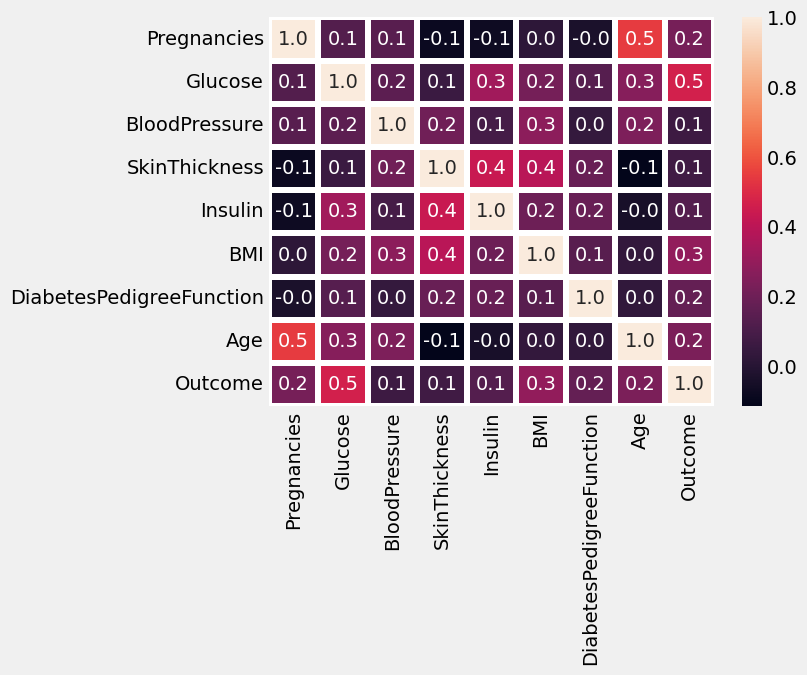

In [10]:
sns.heatmap(corr,annot=True,fmt='0.1f',linewidths=3)
plt.show()

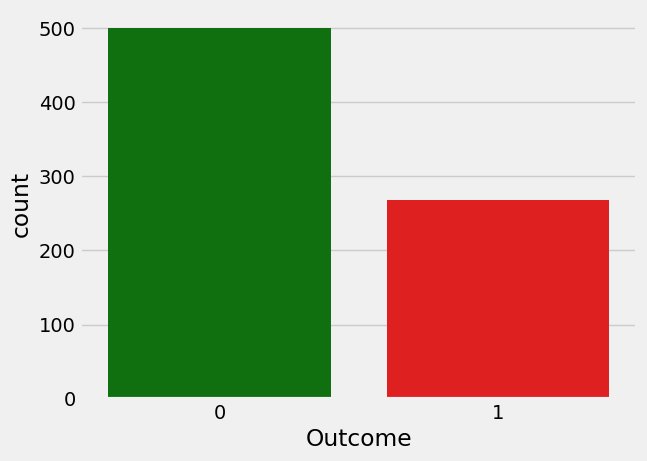

In [11]:
sns.countplot(x='Outcome', data=data,palette=['green','red'])
plt.show()

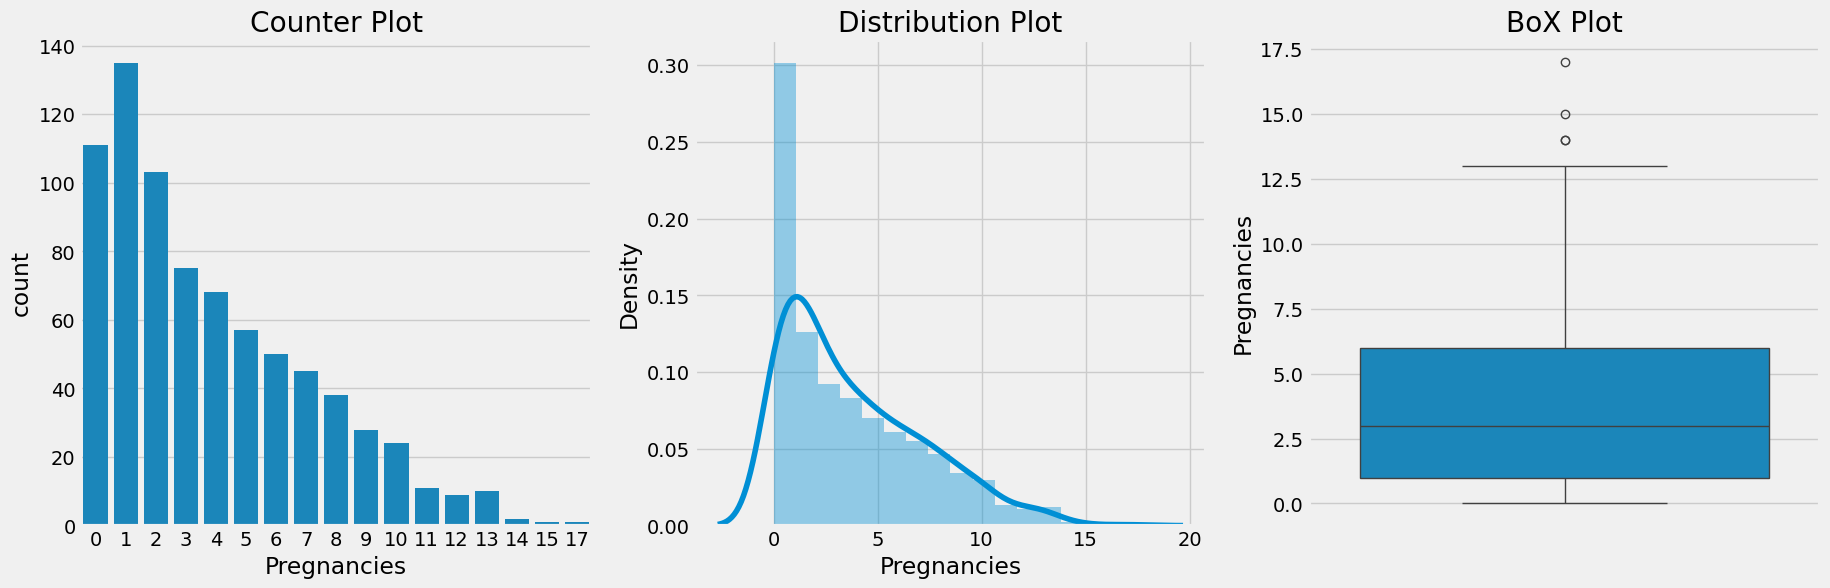

In [12]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt.title('Counter Plot')
sns.countplot(x='Pregnancies',data=data)

plt.subplot(1,3,2)
plt.title('Distribution Plot')
sns.distplot(data['Pregnancies'])

plt.subplot(1,3,3)
plt.title('BoX Plot')
sns.boxplot(y=data['Pregnancies'])

plt.show()



<Axes: ylabel='Age'>

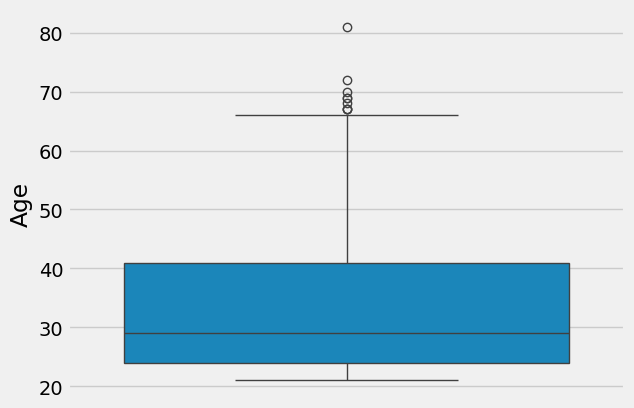

In [13]:
sns.boxplot(data.Age)

# Create Model

In [14]:
 X = data.drop('Outcome',axis=1)
 y = data['Outcome']

# To check balanced of data

In [15]:
max = data[data['Outcome'] == 0]
mini = data[data['Outcome'] == 1]
max.shape , mini.shape

((500, 9), (268, 9))

In [16]:
rm = RandomOverSampler(random_state = 41)
x_res , y_res = rm.fit_resample(X,y)

In [17]:
print("Old DataSet Shape{}".format(Counter(y)))
print("New DataSet Shape{}".format(Counter(y_res)))


Old DataSet ShapeCounter({0: 500, 1: 268})
New DataSet ShapeCounter({1: 500, 0: 500})


In [18]:
x_train ,x_test , y_train , y_test = train_test_split(x_res,y_res, test_size=.2 , random_state=41)

In [19]:
selected_Model = RandomForestClassifier(class_weight='balanced')
selected_parameters = {'n_estimators':(100,200,300),'max_depth':(7,10,15)}
GridSearch_Model = GridSearchCV(estimator=selected_Model,param_grid=selected_parameters,cv=5)
GridSearch_Model.fit(x_train,y_train)
sorted(GridSearch_Model.cv_results_.keys())
GridSearch_Results = pd.DataFrame(GridSearch_Model.cv_results_)[['mean_test_score','std_test_score','params','rank_test_score','mean_fit_time']]

In [20]:
print('All Results are : \n',GridSearch_Results)
print('*'*50)
print('Best Score is : \n',GridSearch_Model.best_score_)
print('*'*50)
print('Best Parameters are :\n',GridSearch_Model.best_params_)
print('*'*50)
print('Best Estimators are :\n',GridSearch_Model.best_estimator_)

All Results are : 
    mean_test_score  std_test_score                                  params  \
0          0.81250        0.040697   {'max_depth': 7, 'n_estimators': 100}   
1          0.79750        0.037832   {'max_depth': 7, 'n_estimators': 200}   
2          0.80500        0.029422   {'max_depth': 7, 'n_estimators': 300}   
3          0.81750        0.038810  {'max_depth': 10, 'n_estimators': 100}   
4          0.81875        0.040505  {'max_depth': 10, 'n_estimators': 200}   
5          0.82000        0.035663  {'max_depth': 10, 'n_estimators': 300}   
6          0.81000        0.032977  {'max_depth': 15, 'n_estimators': 100}   
7          0.81875        0.039330  {'max_depth': 15, 'n_estimators': 200}   
8          0.81125        0.035882  {'max_depth': 15, 'n_estimators': 300}   

   rank_test_score  mean_fit_time  
0                5       0.516343  
1                9       1.410887  
2                8       1.762179  
3                4       0.322123  
4                2 

In [21]:
model1 = LogisticRegression()
model2 = SVC()
model3 = RandomForestClassifier(n_estimators=300 , class_weight='balanced',max_depth=10)
model4 = GradientBoostingClassifier(n_estimators=10)


In [22]:
algorithms = ['LogisticRegression','SVC','RandomForestClassifier','GradientBoostingClassifier']
Accuracy = []
Recall = []
Precision = []
F1 = []

In [23]:
def evaluation(model):
  model.fit(x_train , y_train)
  pre = model.predict(x_test)
  accuracy = accuracy_score(y_test , pre)
  recall = recall_score(y_test , pre)
  precision = precision_score(y_test,pre)
  f1 = f1_score(y_test , pre)
  Accuracy.append(accuracy)
  Recall.append(recall)
  Precision.append(precision)
  F1.append(f1)
  #sns.heatmap(confusion_matrix(y_test,pre))
  #print(f"Classification Report for {model} is : {classification_report(y_test,pre)}")
  result = print(f"accuracy = {accuracy}\n'Recall' = {recall}\n'f1_score' = {f1}\n'precision_score' = {Precision}")
  return result


In [24]:
Results = []
models = [model1,model2,model3,model4]
for model in models:
  print(f"model : {model}")
  Results.append(evaluation(model))


model : LogisticRegression()
accuracy = 0.74
'Recall' = 0.7075471698113207
'f1_score' = 0.7425742574257426
'precision_score' = [0.78125]
model : SVC()
accuracy = 0.69
'Recall' = 0.660377358490566
'f1_score' = 0.693069306930693
'precision_score' = [0.78125, 0.7291666666666666]
model : RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=300)
accuracy = 0.87
'Recall' = 0.9150943396226415
'f1_score' = 0.8818181818181818
'precision_score' = [0.78125, 0.7291666666666666, 0.8508771929824561]
model : GradientBoostingClassifier(n_estimators=10)
accuracy = 0.735
'Recall' = 0.7264150943396226
'f1_score' = 0.7439613526570048
'precision_score' = [0.78125, 0.7291666666666666, 0.8508771929824561, 0.7623762376237624]


In [25]:
df = pd.DataFrame({'Algorithms':algorithms,'Accuracy':Accuracy,'Recall':Recall,'f1_score':F1,'precision_score':Precision})
df

,Algorithms,Accuracy,Recall,f1_score,precision_score
0,LogisticRegression,0.740,0.707547,0.742574,0.781250
1,SVC,0.690,0.660377,0.693069,0.729167
2,RandomForestClassifier,0.870,0.915094,0.881818,0.850877
3,GradientBoostingClassifier,0.735,0.726415,0.743961,0.762376


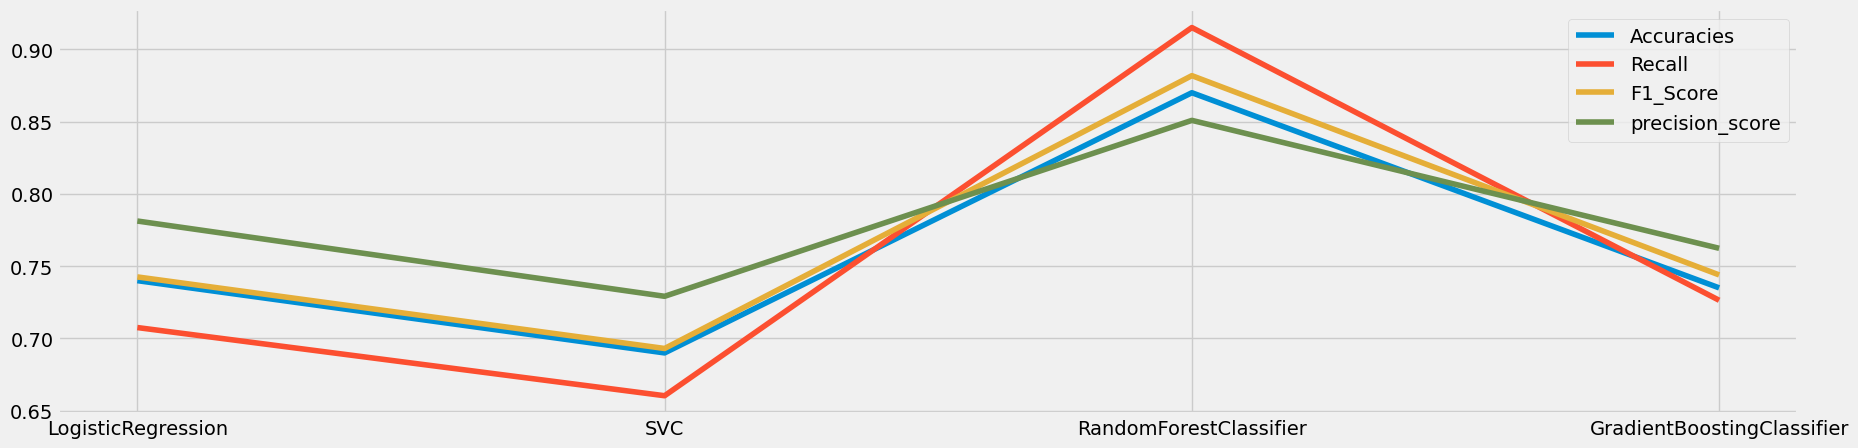

In [26]:
fig , ax = plt.subplots(figsize=(20,5))
plt.plot(df.Algorithms,Accuracy,label='Accuracies')
plt.plot(df.Algorithms,Recall,label='Recall')
plt.plot(df.Algorithms,F1,label='F1_Score')
plt.plot(df.Algorithms,Precision,label='precision_score')
plt.legend()
plt.show()


# Using my Model to predict new data

In [27]:
filename = 'Diabetes_Prediction.pkl'
pickle.dump(model3,open(filename,'wb'))

In [28]:
filename1 = 'Diabetes_Prediction.sav'
pickle.dump(model3,open(filename1,'wb'))

In [29]:
#loadmodel = pickle.load(open(filename,'rb'))